In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import svm            
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
## 我们利用 sklearn 中自带的 iris 数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式
print(iris_features)
print(iris_target)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# 一、数据处理

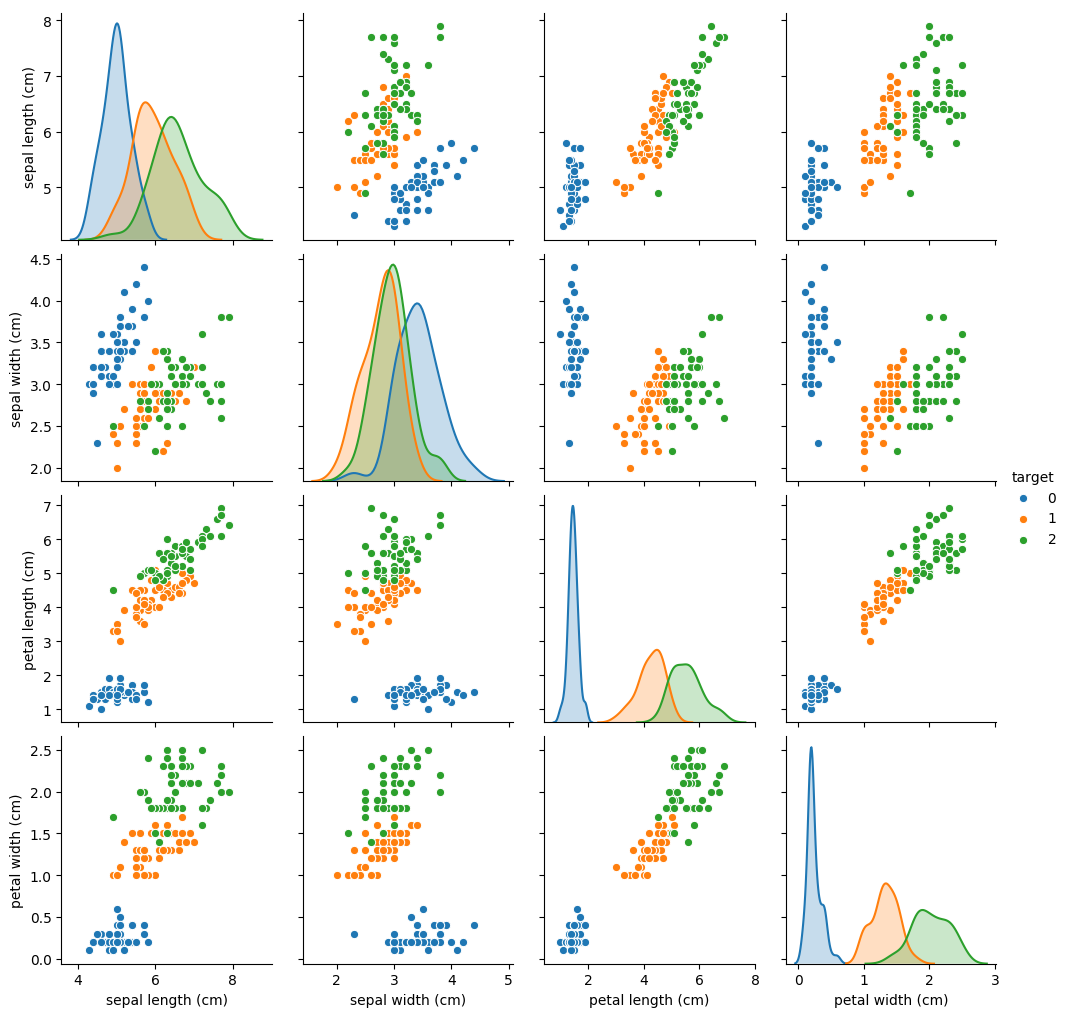

In [3]:
import seaborn as sb
iris_all = iris_features.copy()  # 得到特征数据集的拷贝副本
iris_all['target'] = iris_target  # 增加一列对应的分类数据
# 生成各个特征互相匹配的pairpolt散点图，以便观察三类数据的分离程度
sb.pairplot(data=iris_all, hue="target")  
plt.show()

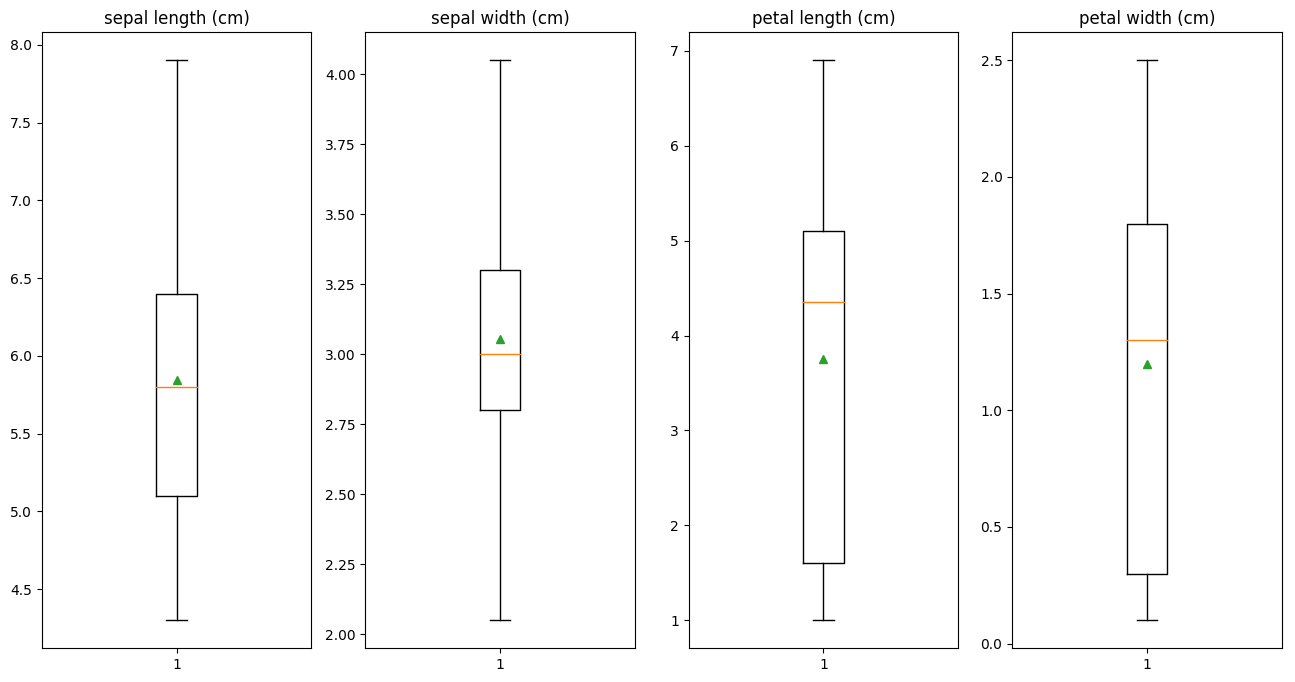

In [4]:
plt.figure(figsize=(16,8))
for i, attribute in enumerate(iris_all.keys()):  # 针对所有特征数据进行处理，减少异常值对训练的影响
    if attribute != 'target':  # 不需要对目标分类这一列进行处理
        Q1 = iris_all[attribute].quantile(0.25)
        Q3 = iris_all[attribute].quantile(0.75)
        IQR = Q3 - Q1
        top = Q3 + 1.5 * IQR
        bottom = Q1 - 1.5 * IQR
        values = iris_all[attribute].values
        values[values > top] = top
        values[values < bottom] = bottom
        iris_all[attribute] = values.astype(iris_all[attribute].dtypes)
        plt.subplot(1, 4, i + 1)  # 子图排版
        plt.boxplot(iris_all[attribute],showmeans=True)  # 生成箱线图
        plt.title(attribute)
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
# 把数据集按照7：3的比例划分训练集和测试集，x代表输入的特性，y代表所属的分类
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris_features, iris_target, random_state=1, shuffle=True, train_size=0.7)
s = MinMaxScaler()
# 找出均值和方差进行归一化
x_train = s.fit_transform(x_train)
# 使用相同的均值和方差进行归一化
x_test = s.transform(x_test)

# 二、 支持向量机SVM分类

In [6]:
# C为误差惩罚项系数，越大越严格，越小泛化能力越好；内核使用线性内核
# 决策函数选择ovr(one vs rest)：将一个类别与其他类别进行划分，训练K个特征分类器，代价较小
svm_model = SVC(C=0.5, kernel="linear", decision_function_shape='ovr')
svm_model.fit(x_train, y_train)  # 使模型对训练数据集的xy进行训练

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
from sklearn.metrics import classification_report
y_pred = svm_model.predict(x_test)  # 把训练好的模型对测试集进行预测
print(classification_report(y_test, y_pred))  # 把预测结果和真实数据比对分析

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



# 三、KMeans聚类算法分类

In [10]:
km_model = KMeans(n_clusters=3)  # 初始化KMeans模型，设置超参聚类总数为3
km_model.fit(x_train, y_train)  # 模型对训练集进行训练

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

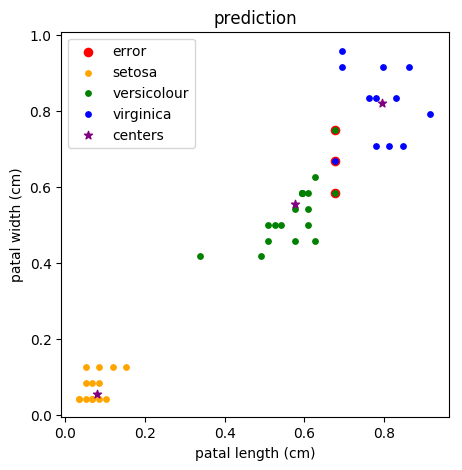

real:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
prediction:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 1 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
centers:
 [[0.18872549 0.56365741 0.07956685 0.05555556]
 [0.45552367 0.29776423 0.57585779 0.55487805]
 [0.7447479  0.46130952 0.79479419 0.81994048]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.94      0.92        18
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [11]:
y_pred_km = km_model.predict(x_test)  # KMeans模型对测试数据集进行预测
centers = km_model.cluster_centers_  # 得到各个类别的中心数据
# 0，1，2分别是三个种类的代号，从预测结果中分出来这三组得到p123, 其中err表示分类错误的数据点
p0 = x_test[y_pred_km == 0]
p1 = x_test[y_pred_km == 1]
p2 = x_test[y_pred_km == 2]
err = x_test[y_test != y_pred_km]

plt.figure(figsize=(5,5))  # 画布大小设置

# 先画预测的分类结果
# 生成散点图，每个类别颜色不一样，并且取的是花瓣(petal)长度x轴和花瓣宽度y轴，
# 因为从pairpolt图像可见这两个参数对应的各类别区分度更高，对应的是测试数据的第2，3列
plt.scatter(err[:, 2], err[:, 3], color="red", label='error', s=35)
plt.scatter(p0[:, 2], p0[:, 3], color="orange", label='setosa', s=15)
plt.scatter(p1[:, 2], p1[:, 3], color="green", label='versicolour', s=15)
plt.scatter(p2[:, 2], p2[:, 3], color="blue", label='virginica', s=15)

# 在图像上把各类的中心点加上
plt.scatter(centers[:,2], centers[:,3], color='purple', marker="*", label='centers')
plt.xlabel('patal length (cm)')
plt.ylabel('patal width (cm)')
plt.legend()  # 显示各点颜色对应的类
plt.title("prediction")
plt.show()
print("real:\n", y_test)  # 输出真实值和预测值
print("prediction:\n",y_pred_km)
print("centers:\n", centers)  # 查看中心点数据
print(classification_report(y_true=y_test, y_pred=y_pred_km))  # 真实值和预测值差距报告